<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Renewable-Energy-Project/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/Renewable-Energy-Project.git

Cloning into 'Renewable-Energy-Project'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 87 (delta 32), reused 2 (delta 1), pack-reused 0
Unpacking objects: 100% (87/87), done.


In [2]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import csv
from scipy import stats

In [3]:
df = pd.read_csv("/content/Renewable-Energy-Project/Data/World_1980_2021.csv", index_col= 'Unnamed: 0')
df = df.astype(float)

In [4]:
Y_cons = np.array(df[df.index == 'Consumption (terajoules)'])
Y_Prod = np.array(df[df.index == 'Production (terajoules)'])
X_year = np.array(df.columns )

In [11]:
X_year[::5]

array(['1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015',
       '2020'], dtype=object)

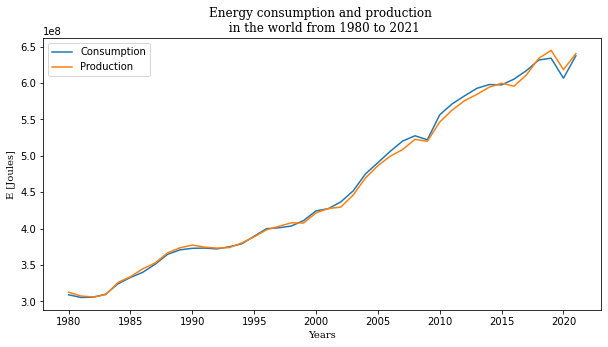

In [37]:
fig,axe = plt.subplots(1,1,figsize = (10, 5))

axe.plot(X_year,Y_cons.reshape(-1),label= 'Consumption')
axe.plot(X_year,Y_Prod.reshape(-1),label= 'Production')
axe.set_title("Energy consumption and production \n in the world from 1980 to 2021" , fontname = 'serif')
axe.set_xlabel('Years', fontname = 'serif')
axe.set_ylabel('E [Joules]', fontname = 'serif')
axe.set_xticks(X_year[::5])
plt.legend()
plt.savefig('energy_consume_production.png',dpi=2000)

## Reg

In [14]:
Y_cons = np.array(df[df.index == 'Consumption (terajoules)'])
Y_Prod = np.array(df[df.index == 'Production (terajoules)'])
X_year = np.array(df.columns.astype(float))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_year.reshape(-1,1), Y_cons.reshape(-1) , test_size=0.5)

In [16]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit( X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [17]:
from matplotlib.lines import MarkerStyle
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [8930177.84920822]
Mean squared error: 362738119189734.50
Coefficient of determination: 0.97


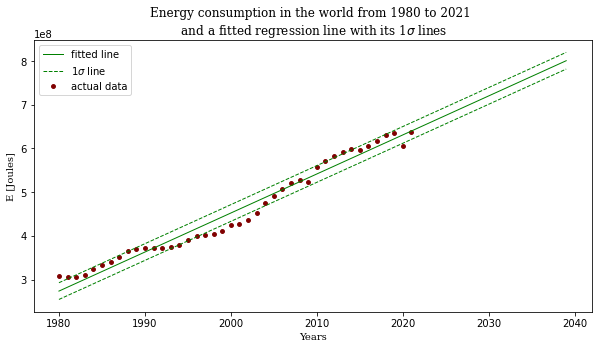

In [36]:
fig,axe = plt.subplots(1,1,figsize = (10, 5))
# Plot outputs
axe.scatter(X_train, y_train, color="maroon" , s = 15 , label= "actual data" )
axe.scatter(X_test, y_test, color="maroon" , s = 15 )

X_future = np.array([range(1980,2040,1)]).reshape(-1,1)
y_future = regr.predict(X_future)
sigma = np.sqrt(np.var(y_future[0:len(Y_cons.reshape(-1))] - Y_cons.reshape(-1)))

axe.plot(X_future , y_future , color="green", linewidth=1 , label = "fitted line")
axe.plot(X_future , y_future - sigma , color="green", linewidth=1,  linestyle='dashed' , label = '1$\sigma$ line'  )
axe.plot(X_future , y_future + sigma , color="green", linewidth=1,  linestyle='dashed' )


axe.set_title("Energy consumption in the world from 1980 to 2021 \n and a fitted regression line with its 1$\sigma$ lines" , fontname = 'serif')
axe.set_xlabel('Years', fontname = 'serif')
axe.set_ylabel('E [Joules]', fontname = 'serif')
plt.legend()

plt.savefig('consume_Energy_LR.png',dpi=2000)